In [28]:
import pandas as pd
from fbprophet import Prophet

In [29]:
df = pd.read_csv('Data/BeerWineLiquor.csv')
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [31]:
# fbprophet 사용하려면 컬럼이 아래와 같이 설정
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [32]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [33]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.44382


/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1083.1    0.00904444       294.156      0.9366      0.9366      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1090.17    0.00867181       180.322       2.611           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       1091.08   0.000541416       355.362   1.742e-06       0.001      315  LS failed, Hessian reset 
     299       1093.33   7.83303e-05        61.266           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       1093.56   2.03171e-05        51.394   2.915e-07       0.001      590  LS failed, Hessian reset 
     399       1093.56   4.87114e-07       60.7879      0.5271      0.5271      610   
    Iter      log prob        ||dx||      ||grad||       alpha

In [34]:
future = m.make_future_dataframe(periods=24, freq='MS') # 2년간 예측
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [35]:
len(df), len(future)

(324, 348)

In [36]:
forecast = m.predict(future)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [37]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1775.113469,1160.183196,1481.626343,1775.113469,1775.113469,-461.687441,-461.687441,-461.687441,-461.687441,-461.687441,-461.687441,0.0,0.0,0.0,1313.426027
1,1992-02-01,1777.852086,1184.771015,1518.830718,1777.852086,1777.852086,-427.083046,-427.083046,-427.083046,-427.083046,-427.083046,-427.083046,0.0,0.0,0.0,1350.769040
2,1992-03-01,1780.414018,1439.137723,1764.172018,1780.414018,1780.414018,-179.053492,-179.053492,-179.053492,-179.053492,-179.053492,-179.053492,0.0,0.0,0.0,1601.360526
3,1992-04-01,1783.152635,1428.896382,1751.177720,1783.152635,1783.152635,-196.032490,-196.032490,-196.032490,-196.032490,-196.032490,-196.032490,0.0,0.0,0.0,1587.120145
4,1992-05-01,1785.802910,1672.352183,1997.831158,1785.802910,1785.802910,45.310292,45.310292,45.310292,45.310292,45.310292,45.310292,0.0,0.0,0.0,1831.113202


In [38]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [39]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1160.183196,1481.626343,1313.426027
1,1992-02-01,1184.771015,1518.830718,1350.769040
2,1992-03-01,1439.137723,1764.172018,1601.360526
3,1992-04-01,1428.896382,1751.177720,1587.120145
4,1992-05-01,1672.352183,1997.831158,1831.113202
...,...,...,...,...
343,2020-08-01,5081.253373,5407.324302,5242.693344
344,2020-09-01,4929.189504,5251.386946,5085.487197
345,2020-10-01,5028.614476,5355.777113,5191.021340
346,2020-11-01,5172.531975,5501.481014,5338.634997


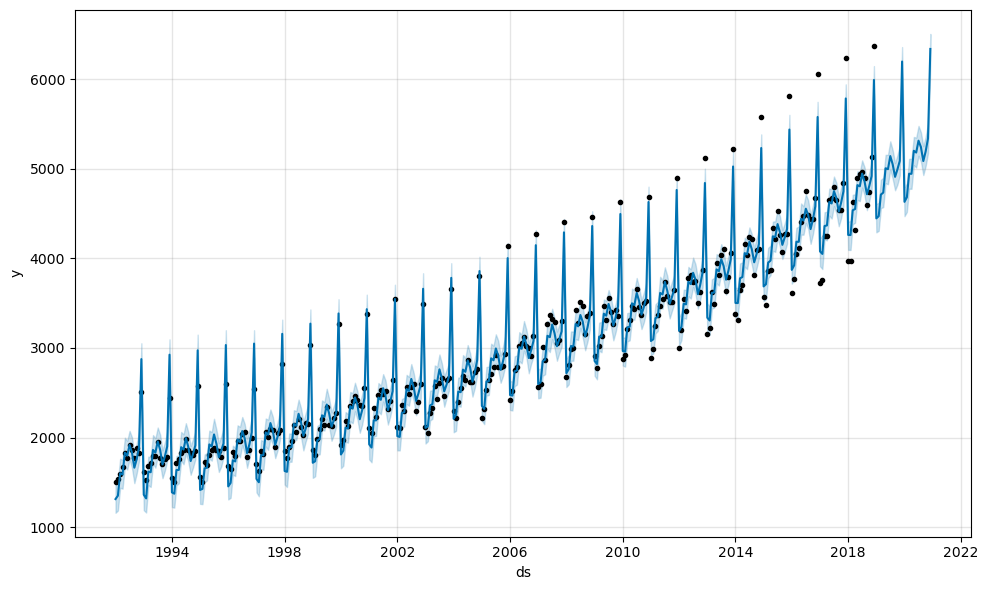

In [40]:
m.plot(forecast);

(16071.0, 18628.0)

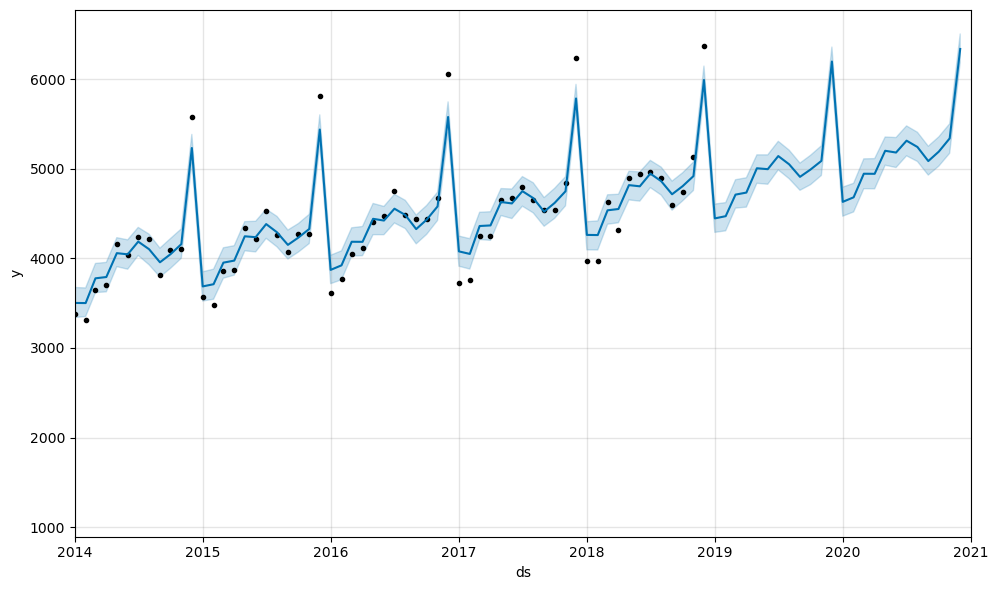

In [44]:
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
m.plot(forecast)
plt.xlim(date(2014, 1, 1), date(2021, 1, 1))

<AxesSubplot:xlabel='ds'>

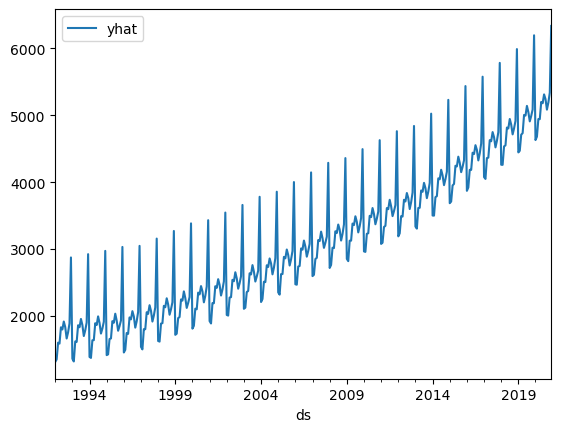

In [45]:
forecast.plot(x='ds', y='yhat')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


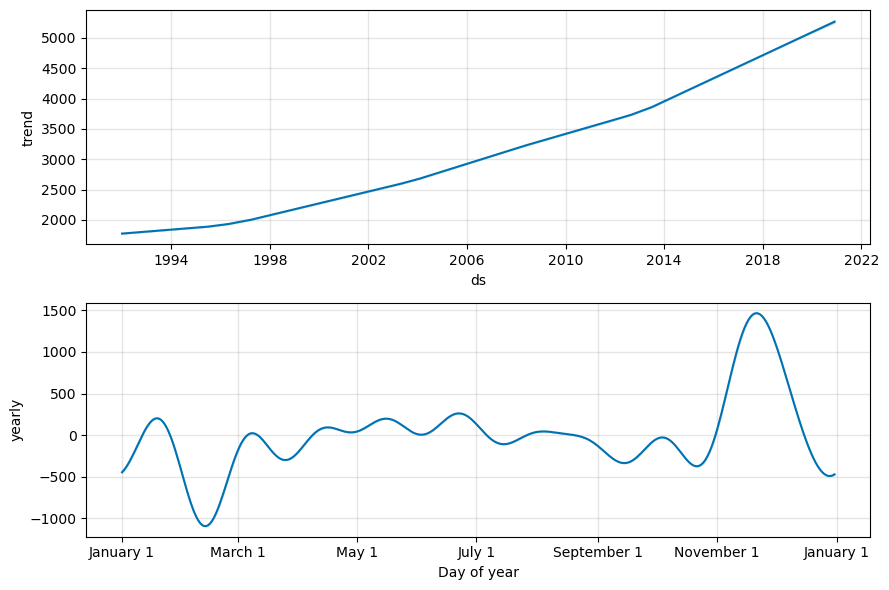

In [47]:
m.plot_components(forecast);